# Machine Learning (Supervised)

Machine learning is a field of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Python is the di facto language in this field due to its simplicity and the rich ecosystem of data science libraries and frameworks it offers.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Linear and logistic regression

### Linear regression

In [2]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
# Data Preprocessing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cali.data, 
            cali.target, test_size=0.2, random_state=0)

In [4]:
# Dimensional Reduction

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# For the Linear Regression

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test) 

In [7]:
# Reading results on the linear regression

from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.5351261336554507


### Logistic regression
Now we run an example of Logistic regression with already loaded dataset

In [9]:
import numpy as np
avg_price_house = np.average(cali.target)

In [10]:
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0

In [11]:
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      2467
         1.0       0.82      0.77      0.79      1661

    accuracy                           0.84      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128



 macro average says the function to compute precision / recall / f1-score for each label, and returns the average without considering the proportion for each label in the dataset. Weighted average says the function to compute precision / recall / f1-score for each label, and returns the average considering the proportion for each label in the dataset.
 
 ---------


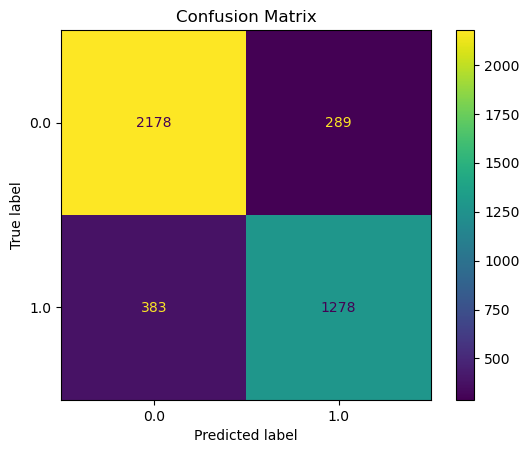

In [15]:
# Evaluate the model by means of a Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

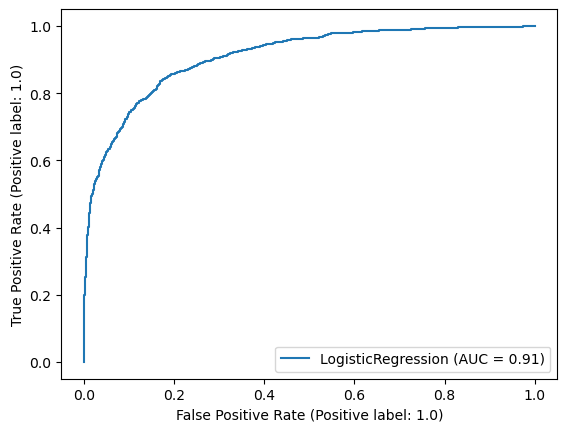

In [16]:
# Evaluate the model by means of a ROC Curve, which only works for a binary target.

from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(clf, X_test, Y_test)

## Naive Bayes
 Naive Bayes comes from the assumption that all features in the dataset are mutually independent. In real life, it's uncommon for predictors to be independent of each other, but this assumption simplifies the calculation
 
 There are mainly three types of Naive Bayes models: Gaussian, Multinomial & Bernoulli

In [17]:
# Load data to work with
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
# To showcase the categories of the variables
target_names=iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# For the Data training & Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.2, random_state=0)

In [20]:
# Preprocessing & Dimensional Reduction
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here's the Gaussian Naive Bayes with its report

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)


In [22]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



### Evaluate the model by means of a Confusion Matrix

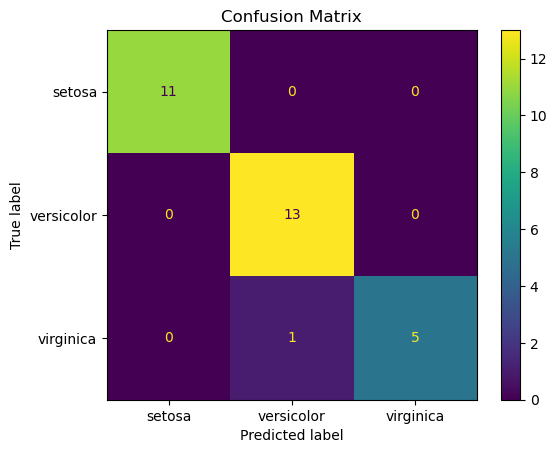

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, display_labels=target_names)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

-----------------------------------------------------------------------------------------------------

# IPO analysis and trading strategies 

An IPO is the process whereby a private company becomes a public company. Public offerings raise capital for the company and give the general public an opportunity to invest in the company by buying its shares.

Though there are variations in how this occurs, in a typical offering, a company enlists the help of one or more investment banks to underwrite their offering. This means that the banks make a guarantee to the company that they will purchase all of the shares being offered at the IPO price on the day of the IPO.

The underwriters, of course, do not intend to keep all of the shares themselves. With the help of the offering company, they go on what's called a roadshow to drum up interest from institutional clients. These clients put in a subscription for the shares, which indicates their interest in buying shares on the day of the IPO. This is a non-binding contract, as the price of the offering is not finalized until the day of the IPO. The underwriter will then set the offer price, given the level of interest expressed.

What is interesting from our perspective is that research has consistently shown a systematic underpricing of IPOs. There are a number of theories as to why this happens, and why this level of underpricing seems to vary over time, but studies have shown that billions of dollars are left on the table every year.

In an IPO, money left on the table, is the difference between the offering price of shares and the first day's closing price.

While you can occasionally get in on the deal through your broker and receive the IPO at its offering price, in nearly all instances, you, as a member of the general public, will have to purchase the IPO at the (typically higher) opening price. 

### Load Data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('IPO_clean.csv')
df.head()

# The y is the target, which is 1 when the '1st Day Open to Close % Chg' is higher than a threshold, i.e., 2.5%.

,Date,Company,Ticker,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Year,Month,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,y
0,2020-01-17,I-Mab,IMAB,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,2020,1,-0.135593,-2.00,0
1,2020-01-17,LIZHI,LIZI,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,2020,1,0.054397,0.60,1
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,13.5,13.50,13.50,0.000000,0.00,0.00,1.0,2020,1,0.000000,0.00,0
3,2020-01-17,Velocity Financial,VEL,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,2020,1,-0.024549,-0.34,0
4,2020-01-24,Gores Holdings IV,GHIVU,10.0,10.52,10.45,0.045000,0.52,0.45,1.0,2020,1,-0.006654,-0.07,0


-----------------------------------------------------------------------------------------------------

### EDA (Exploratory Data Analysis)
Here we take the case of a company's IPO and see its explanatory data and its descriptive analysis

In [25]:
summary_by_year_1 = df.groupby('Year')['1st Day % Chg'].describe()
summary_by_year_1

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


We get a quick summary of the performance of the stocks over the past 18 years. From the table, we can see the extraordinary average return of the IPO market in 2000. At over 35%, it is more than double any other year on the list. Also notable is the fact that every year has had a positive average return for first-day performance.

The important point about these numbers is that they ('1st Day % Chg') are not the first-day performance that the general investing public could expect to receive on that first-day. Only investors who got in on the offering could expect to see these numbers.

-----------------------------------------------------------------------------------------------------

#### The first-day return that the general public could expect to receive would be the difference between the opening price and the closing price ('1st Day Open to Close % Chg'). 


In [26]:
summary_by_year_2 = df.groupby('Year')['1st Day Open to Close % Chg'].describe()
summary_by_year_2

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.057282,0.183849,-0.485294,-0.034268,0.023364,0.110714,1.000000
2001,93.0,0.030659,0.088169,-0.141966,-0.007937,0.009877,0.044872,0.399340
2002,82.0,0.003687,0.073340,-0.226667,-0.034346,0.000000,0.032486,0.303699
2003,79.0,0.020931,0.094637,-0.187937,-0.017105,0.002855,0.052692,0.413578
2004,233.0,0.011221,0.083990,-0.345455,-0.026923,0.000000,0.044681,0.371765
2005,226.0,0.010077,0.091088,-0.210000,-0.023934,0.000000,0.034372,0.856667
2006,236.0,0.007168,0.074630,-0.295455,-0.027778,0.000192,0.031907,0.370575
2007,256.0,0.016880,0.082552,-0.269091,-0.014573,0.004464,0.038096,0.380000
2008,47.0,-0.003023,0.051146,-0.115758,-0.021111,0.000000,0.009384,0.185000


In [27]:
# The y is the target, which is 1 when the '1st Day Open to Close % Chg' is higher than a threshold, i.e., 2.5%.
summary_by_year_3 = df.groupby('Year')['y'].sum()
summary_by_year_3

Year
2000    117
2001     33
2002     24
2003     28
2004     80
2005     64
2006     66
2007     77
2008      7
2009     19
2010     42
2011     33
2012     43
2013     76
2014     86
2015     61
2016     22
2017     54
2018     53
2019     65
2020     41
Name: y, dtype: int64